### 9.4 双层神经网络实现非线性回归
<img src="https://microsoft.github.io/ai-edu/%E5%9F%BA%E7%A1%80%E6%95%99%E7%A8%8B/A2-%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%9F%BA%E6%9C%AC%E5%8E%9F%E7%90%86/%E7%AC%AC4%E6%AD%A5%20-%20%E9%9D%9E%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92/img/9/nn.png">

#### 输入层

输入层就是一个标量x值，如果是成批输入，则是一个矢量或者矩阵，但是特征值数量总为1，因为只有一个横坐标值做为输入。

$$X = (x)$$

#### 权重矩阵W1/B1

$$
W1=
\begin{pmatrix}
w1_{11} & w1_{12} & w1_{13}
\end{pmatrix}
$$

$$
B1=
\begin{pmatrix}
b1_{1} & b1_{2} & b1_{3} 
\end{pmatrix}
$$
先读取数据：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from HelperClass2.NeuralNet_2_0 import *
from HelperClass2.DataReader_2_0 import *
train_data_name = "ch09_1.train.npz"
test_data_name = "ch09_1.test.npz"
reader = DataReader_2_0(train_data_name, test_data_name)
reader.ReadData()
print("X数据：\n",reader.XTrainRaw[:3])
print("Y数据：\n",reader.YTrainRaw[:3])

X数据：
 [[0.82883643]
 [0.09618617]
 [0.62155319]]
Y数据：
 [[-0.87166035]
 [ 0.48192171]
 [-0.71338129]]


数据可视化：

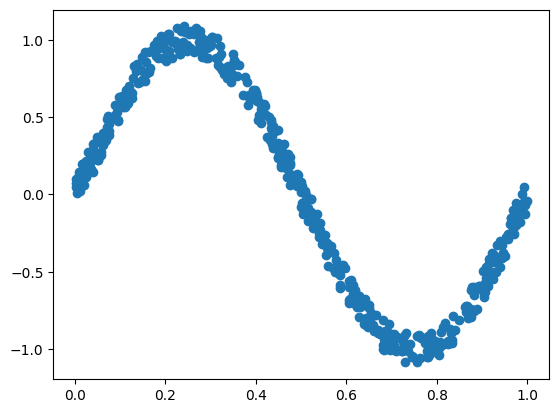

In [2]:
plt.scatter(reader.XTrainRaw[:,0],reader.YTrainRaw[:,0])

生成验证集，将训练集里的十分之一的数据提取出来做验证集：

In [3]:
k = 10
# 训练集的个数等于总样本个数除以10
reader.num_validation = (int)(reader.num_train / k)
# 更新训练集的大小
reader.num_train = reader.num_train - reader.num_validation
# 验证集
reader.XDev = reader.XTrain[0:reader.num_validation]
reader.YDev = reader.YTrain[0:reader.num_validation]
# 训练集
reader.XTrain = reader.XTrain[reader.num_validation:]
reader.YTrain = reader.YTrain[reader.num_validation:]
print("验证集大小：",reader.num_validation)
print("训练集大小：",reader.num_train)

验证集大小： 50
训练集大小： 450


创建一个子文件夹$sin_121$来放初始化后的$w,b$参数：

In [4]:
model_name = "sin_121"
def __create_subfolder():
    if model_name != None:
        path = model_name.strip()
        path = path.rstrip("\\")
        isExists = os.path.exists(path)
        if not isExists:
            os.makedirs(path)
        return path
subfolder = os.getcwd() + "\\" + __create_subfolder()
print("参数路径：",subfolder)

参数路径： c:\Users\muyoo\Documents\AI学习\非线性回归\sin_121


使用Xavier方法初始化$w,b$：

In [5]:
n_input, n_hidden, n_output = 1, 2, 1
eta, batch_size, max_epoch = 0.05, 10, 5000

wb1 = WeightsBias_1_0(n_input, n_hidden, InitialMethod.Xavier, eta)
wb1.InitializeWeights(subfolder, False)
wb2 = WeightsBias_1_0(n_hidden, n_output, InitialMethod.Xavier, eta)
wb2.InitializeWeights(subfolder, False)
print("W1:",wb1.W)
print("B1:",wb1.B)
print("W2:",wb2.W)
print("B2:",wb2.B)

W1: [[0.80850367 0.38044913]]
B1: [[0. 0.]]
W2: [[0.99734071]
 [0.68211674]]
B2: [[0.]]


获取一个计算批次

In [6]:
batch_size = 10
batch_x, batch_y = reader.GetBatchTrainSamples(batch_size, 0)
print(batch_x)

[[0.80200784]
 [0.9218713 ]
 [0.49176632]
 [0.81316241]
 [0.28280854]
 [0.42372096]
 [0.41822499]
 [0.22837097]
 [0.22477366]
 [0.4211547 ]]


#### 前向计算
<img src="https://microsoft.github.io/ai-edu/%E5%9F%BA%E7%A1%80%E6%95%99%E7%A8%8B/A2-%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%9F%BA%E6%9C%AC%E5%8E%9F%E7%90%86/%E7%AC%AC4%E6%AD%A5%20-%20%E9%9D%9E%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92/img/9/forward.png">  

##### 线性计算

$$
z1_{1} = x \cdot w1_{11} + b1_{1}
$$

$$
z1_{2} = x \cdot w1_{12} + b1_{2}
$$

$$
z1_{3} = x \cdot w1_{13} + b1_{3}
$$

In [7]:
Z1 = np.dot(batch_x, wb1.W) + wb1.B
print(Z1)

[[0.64842628 0.30512318]
 [0.74533632 0.35072513]
 [0.39759488 0.18709207]
 [0.65744479 0.30936693]
 [0.22865174 0.10759426]
 [0.34257995 0.16120427]
 [0.33813644 0.15911333]
 [0.18463877 0.08688354]
 [0.18173033 0.08551494]
 [0.34050512 0.16022794]]



##### 激活函数

$$
a1_{1} = Sigmoid(z1_{1})
$$

$$
a1_{2} = Sigmoid(z1_{2})
$$

$$
a1_{3} = Sigmoid(z1_{3})
$$

矩阵形式：

$$
A1 = Sigmoid(Z1) \tag{2}
$$

In [8]:
A1 = Sigmoid().forward(Z1)
print(A1)

[[0.65665574 0.57569444]
 [0.67816166 0.58679341]
 [0.59810967 0.54663706]
 [0.65868616 0.57673073]
 [0.55691518 0.52687265]
 [0.58481709 0.54021402]
 [0.58373777 0.53969462]
 [0.546029   0.52170723]
 [0.54530796 0.52136572]
 [0.58431322 0.53997151]]


##### 输出层

由于我们只想完成一个拟合任务，所以输出层只有一个神经元：

$$
\begin{aligned}
Z2&=a1_{1}w2_{11}+a1_{2}w2_{21}+a1_{3}w2_{31}+b2_{1} \\\\
&= 
\begin{pmatrix}
a1_{1} & a1_{2} & a1_{3}
\end{pmatrix}
\begin{pmatrix}
w2_{11} \\\\ w2_{21} \\\\ w2_{31}
\end{pmatrix}
+b2_1 \\\\
&=A1 \cdot W2+B2
\end{aligned} \tag{3}
$$

In [9]:
A2 = Z2 = np.dot(A1, wb2.W) + wb2.B
print(Z2)

[[1.04760032]
 [1.07661984]
 [0.96938941]
 [1.05033221]
 [0.91482283]
 [0.95175091]
 [0.95032018]
 [0.90044219]
 [0.89949011]
 [0.95108296]]


#### 反向传播
<img src="https://microsoft.github.io/ai-edu/%E5%9F%BA%E7%A1%80%E6%95%99%E7%A8%8B/A2-%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%9F%BA%E6%9C%AC%E5%8E%9F%E7%90%86/%E7%AC%AC4%E6%AD%A5%20-%20%E9%9D%9E%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92/img/9/backward.png">

##### 损失函数

均方差损失函数：

$$loss(w,b) = \frac{1}{2} (z2-y)^2 \tag{4}$$
##### 求损失函数对输出层的反向误差

根据公式4：

$$
\frac{\partial loss}{\partial z2} = z2 - y \rightarrow dZ2 \tag{5}
$$

In [10]:
# 批量下降，需要除以样本数量，否则会造成梯度爆炸
m = batch_x.shape[0]
# 第二层的梯度输入 公式5
dZ2 = A2 - batch_y
print(dZ2)

[[ 2.07032841]
 [ 1.45534089]
 [ 0.91316855]
 [ 1.90836578]
 [-0.06856711]
 [ 0.57695961]
 [ 0.36274938]
 [-0.07798675]
 [-0.06551976]
 [ 0.38084913]]


##### 求W2的梯度

根据公式3和W2的矩阵形状，把标量对矩阵的求导分解到矩阵中的每一元素：

$$
\begin{aligned}
\frac{\partial loss}{\partial W2} &= 
\begin{pmatrix}
    \frac{\partial loss}{\partial z2}\frac{\partial z2}{\partial w2_{11}} \\\\
    \frac{\partial loss}{\partial z2}\frac{\partial z2}{\partial w2_{21}} \\\\
    \frac{\partial loss}{\partial z2}\frac{\partial z2}{\partial w2_{31}}
\end{pmatrix}
\begin{pmatrix}
    dZ2 \cdot a1_{1} \\\\
    dZ2 \cdot a1_{2} \\\\
    dZ2 \cdot a1_{3}
\end{pmatrix} \\\\
&=\begin{pmatrix}
    a1_{1} \\\\ a1_{2} \\\\ a1_{3}
\end{pmatrix} \cdot dZ2
=A1^{\top} \cdot dZ2 \rightarrow dW2
\end{aligned} \tag{6}
$$

In [11]:
# 第二层的权重和偏移 公式6
wb2.dW = np.dot(A1.T, dZ2)/m
print(wb2.dW)

[[0.48048425]
 [0.42477771]]


#### 求B2的梯度

$$
\frac{\partial loss}{\partial B2}=dZ2 \rightarrow dB2 \tag{7}
$$

In [12]:
# 公式7 对于多样本计算，需要在横轴上做sum，得到平均值
wb2.dB = np.sum(dZ2, axis=0, keepdims=True)/m 
print(wb2.dB)

[[0.74556881]]


##### 求A1
$$
\begin{aligned}
\frac{\partial loss}{\partial A1}&=
\begin{pmatrix}
    \frac{\partial loss}{\partial Z2}\frac{\partial Z2}{\partial a1_{11}}
    &
    \frac{\partial loss}{\partial Z2}\frac{\partial Z2}{\partial a1_{12}}
    &
    \frac{\partial loss}{\partial Z2}\frac{\partial Z2}{\partial a1_{13}}
\end{pmatrix} \\\\
&=
\begin{pmatrix}
dZ2 \cdot w2_{11} & dZ2 \cdot w2_{12} & dZ2 \cdot w2_{13}
\end{pmatrix} \\\\
&=dZ2 \cdot
\begin{pmatrix}
    w2_{11} & w2_{21} & w2_{31}
\end{pmatrix} \\\\
&=dZ2 \cdot
\begin{pmatrix}
    w2_{11} \\\\ w2_{21} \\\\ w2_{31}
\end{pmatrix}^{\top}=dZ2 \cdot W2^{\top}
\end{aligned} \tag{8}
$$

In [13]:
# 第一层的梯度输入 公式8
d1 = np.dot(dZ2, wb2.W.T)
print(d1)

[[ 2.0648228   1.41220566]
 [ 1.45147072  0.99271239]
 [ 0.91074017  0.62288756]
 [ 1.90329088  1.30172825]
 [-0.06838477 -0.04677077]
 [ 0.57542531  0.39355381]
 [ 0.36178472  0.24743742]
 [-0.07777936 -0.05319607]
 [-0.06534553 -0.04469213]
 [ 0.37983635  0.25978357]]


##### 激活函数的反向传播

$$
\frac{\partial A1}{\partial Z1}= Sigmoid'(A1) = A1 \odot (1-A1) \tag{9}
$$

所以最后到达Z1的误差矩阵是：

$$
\begin{aligned}
\frac{\partial loss}{\partial Z1}&=\frac{\partial loss}{\partial A1}\frac{\partial A1}{\partial Z1} \\\\
&=dZ2 \cdot W2^T \odot Sigmoid'(A1) \rightarrow dZ1
\end{aligned} \tag{10}
$$

In [14]:
# 第一层的dZ 公式10
dZ1,_ = Sigmoid().backward(None, A1, d1)
print(dZ1)

[[ 0.46553284  0.34495997]
 [ 0.31679571  0.2406999 ]
 [ 0.21891871  0.1543671 ]
 [ 0.42789538  0.317768  ]
 [-0.01687467 -0.01165892]
 [ 0.13971675  0.09775201]
 [ 0.08790934  0.06146948]
 [-0.01928005 -0.01327395]
 [-0.01620224 -0.01115263]
 [ 0.09225894  0.06453083]]


##### 再求$w1,b1$
$$
dW1=X^T \cdot dZ1 \tag{11}
$$

$$
dB1=dZ1 \tag{12}
$$

In [15]:
# 第一层的权重和偏移 公式11
wb1.dW = np.dot(batch_x.T, dZ1)/m
print("dW1:",wb1.dW)
# 公式12 对于多样本计算，需要在横轴上做sum，得到平均值
wb1.dB = np.sum(dZ1, axis=0, keepdims=True)/m 
print("dB1:",wb1.dW)

dW1: [[0.12430161 0.09183341]]
dB1: [[0.12430161 0.09183341]]


然后更新权重矩阵就可以了

c:\Users\muyoo\Documents\AI学习\非线性回归\sin_121
testing...
0.9885697326084898


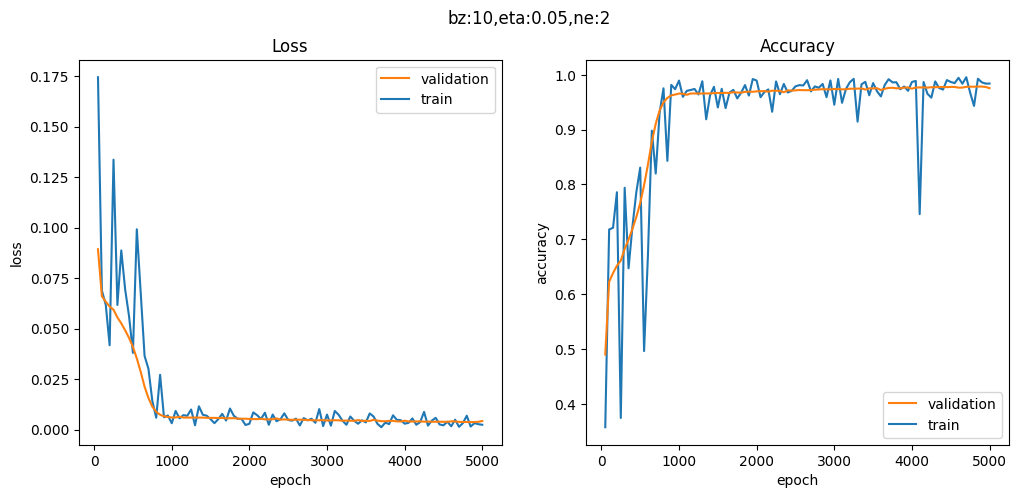

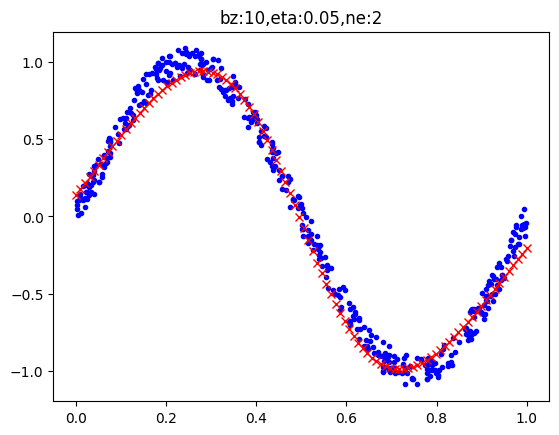

In [16]:

def ShowResult(net, dataReader, title):
    # draw train data
    X,Y = dataReader.XTrain, dataReader.YTrain
    plt.plot(X[:,0], Y[:,0], '.', c='b')
    # create and draw visualized validation data
    TX = np.linspace(0,1,100).reshape(100,1)
    TY = net.inference(TX)
    plt.plot(TX, TY, 'x', c='r')
    plt.title(title)
    plt.show()


eps = 0.001
hp = HyperParameters_2_0(n_input, n_hidden, n_output, eta, max_epoch, batch_size, eps, NetType.Fitting, InitialMethod.Xavier)
net = NeuralNet_2_0(hp, "sin_121")

net.train(reader, 50, True)
net.ShowTrainingHistory()
ShowResult(net, reader, hp.toString())


c:\Users\muyoo\Documents\AI学习\非线性回归\complex_131
testing...
0.9984890577310699


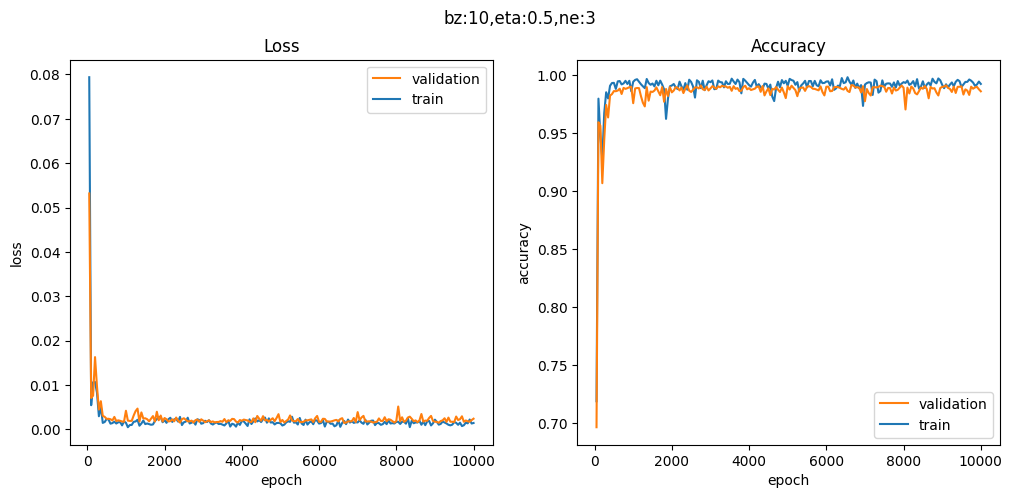

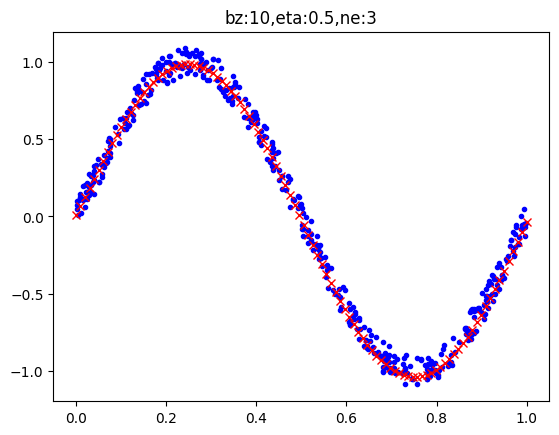

In [17]:
dataReader = DataReader_2_0(train_data_name, test_data_name)
dataReader.ReadData()
dataReader.GenerateValidationSet()

n_input, n_hidden, n_output = 1, 3, 1
eta, batch_size, max_epoch = 0.5, 10, 10000
eps = 0.001

hp = HyperParameters_2_0(n_input, n_hidden, n_output, eta, max_epoch, batch_size, eps, NetType.Fitting, InitialMethod.Xavier)
net = NeuralNet_2_0(hp, "complex_131")

net.train(dataReader, 50, True)
net.ShowTrainingHistory()
ShowResult(net, dataReader, hp.toString())